<a href="https://colab.research.google.com/github/muoyo/chicago-ridesharing/blob/anesu/Visualizations_and_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#Mounting Google Drive
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [4]:
# Access data from google drive
path = "/content/drive/My Drive/rideshare2.csv"
ride_data = pd.read_csv(path)
ride_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 8 columns):
trip_start_timestamp      1000000 non-null object
trip_end_timestamp        1000000 non-null object
trip_seconds              999963 non-null float64
trip_miles                1000000 non-null float64
pickup_community_area     1000000 non-null float64
dropoff_community_area    1000000 non-null float64
fare                      999998 non-null float64
trip_total                999998 non-null float64
dtypes: float64(6), object(2)
memory usage: 61.0+ MB


/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


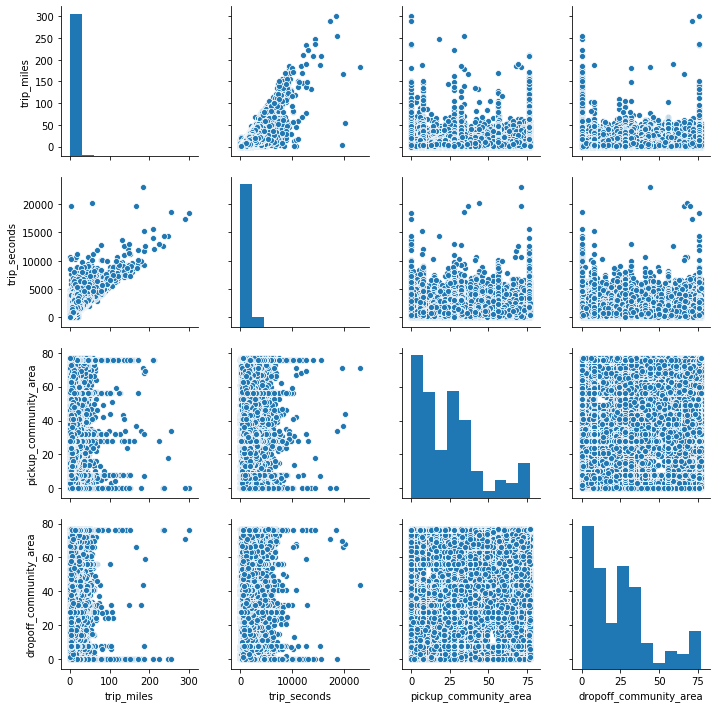

In [5]:
# Convert timestamp columns to datetime
ride_data['trip_start_timestamp']= pd.to_datetime(ride_data['trip_start_timestamp'])
ride_data['trip_end_timestamp']= pd.to_datetime(ride_data['trip_end_timestamp'])

# Explore colinearity of independent variables
ride_variables= ride_data[['trip_miles','trip_seconds','pickup_community_area','dropoff_community_area']]
sns.pairplot(ride_variables)

In [6]:
ride_variables.corr()

,trip_miles,trip_seconds,pickup_community_area,dropoff_community_area
trip_miles,1.000000,0.809803,0.142776,0.136380
trip_seconds,0.809803,1.000000,0.093550,0.104288
pickup_community_area,0.142776,0.093550,1.000000,0.147683
dropoff_community_area,0.136380,0.104288,0.147683,1.000000


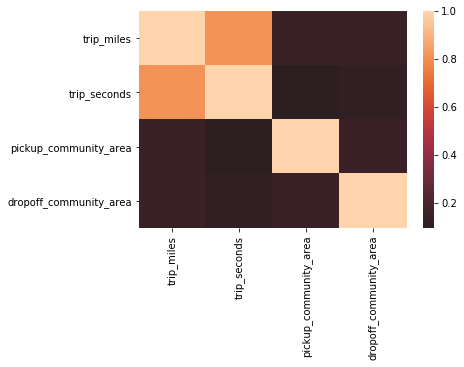

In [7]:
sns.heatmap(ride_variables.corr(), center=0)

In [8]:
# Create a dataframe for visualizations and modeling
ride_share = ride_data.iloc[:, :7]
ride_share.head()

,trip_start_timestamp,trip_end_timestamp,trip_seconds,trip_miles,pickup_community_area,dropoff_community_area,fare
0,2019-02-05 21:15:00,2019-02-05 21:30:00,808.0,4.625240,4.0,6.0,10.0
1,2019-01-12 00:00:00,2019-01-12 00:15:00,590.0,2.215248,8.0,32.0,7.5
2,2019-02-08 21:45:00,2019-02-08 22:00:00,349.0,1.410022,24.0,24.0,5.0
3,2019-03-04 00:00:00,2019-03-04 00:15:00,1439.0,17.728125,76.0,8.0,25.0
4,2019-02-04 08:45:00,2019-02-04 08:45:00,268.0,1.132505,70.0,71.0,5.0


In [9]:
# Create separate columns trip start, time in hours, date, day in weekedays and time blocks of 3 hours each

ride_share['start_date'] = [d.date() for d in ride_share['trip_start_timestamp']]

ride_share['start_day'] = [d.weekday() for d in ride_share['trip_start_timestamp']]

ride_share['start_time'] = [d.hour for d in ride_share['trip_start_timestamp']]

ride_share['time_block'] = ride_share['start_time']//3

ride_share.head()

,trip_start_timestamp,trip_end_timestamp,trip_seconds,trip_miles,pickup_community_area,dropoff_community_area,fare,start_date,start_day,start_time,time_block
0,2019-02-05 21:15:00,2019-02-05 21:30:00,808.0,4.625240,4.0,6.0,10.0,2019-02-05,1,21,7
1,2019-01-12 00:00:00,2019-01-12 00:15:00,590.0,2.215248,8.0,32.0,7.5,2019-01-12,5,0,0
2,2019-02-08 21:45:00,2019-02-08 22:00:00,349.0,1.410022,24.0,24.0,5.0,2019-02-08,4,21,7
3,2019-03-04 00:00:00,2019-03-04 00:15:00,1439.0,17.728125,76.0,8.0,25.0,2019-03-04,0,0,0
4,2019-02-04 08:45:00,2019-02-04 08:45:00,268.0,1.132505,70.0,71.0,5.0,2019-02-04,0,8,2


In [0]:
ride_share['fare'] = ride_share['fare'].fillna(0)

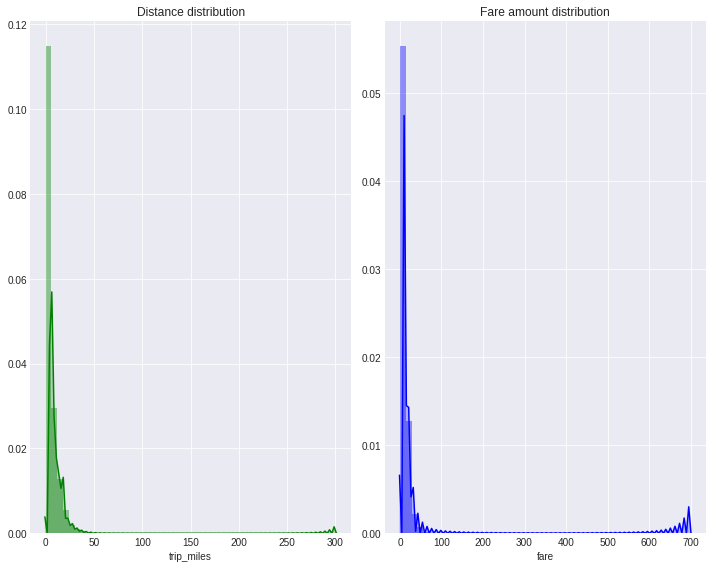

In [11]:
# Create distance and fare amount distribution vizulizations

# set seaborn style with dark grid
plt.style.use('seaborn-darkgrid')

"""
- combine the distplots in one figure, customize the size

"""
f = plt.subplots(2,2,figsize=(10,8))
plt.subplot(1, 2, 1)
sns.distplot(ride_share['trip_miles'], kde=True, color="g", kde_kws={"shade": True}, label = 'trip-miles')
plt.title('Distance distribution')

plt.subplot(1, 2, 2)
sns.distplot(ride_share['fare'], kde=True, color="b", kde_kws={"shade": True}, label = 'fare-amount')
plt.title('Fare amount distribution')

plt.tight_layout()

Text(0, 0.5, 'fare-amount')

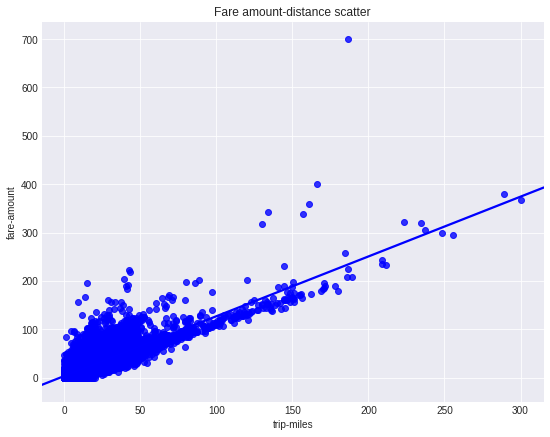

In [12]:
# Create scatterplot of trip in miles with fare amounts
fig, ax = plt.subplots(figsize=(9,7))

# Plot the data, set the size (s), color and transparency (alpha)
# of the points
sns.regplot(ride_share['trip_miles'], ride_share['fare'], color = 'b')


# Label the axes and provide a title
ax.set_title('Fare amount-distance scatter')
ax.set_xlabel('trip-miles')
ax.set_ylabel('fare-amount')

Text(0.5, 1.0, 'Mean fare amount per weekday day')

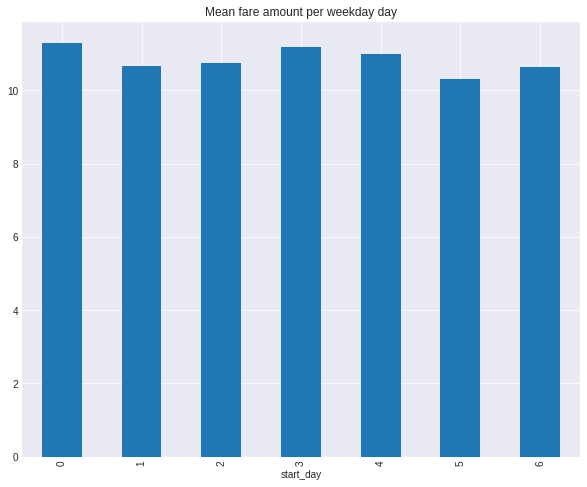

In [13]:

# groupby data by pickup day and estimate the mean 

fig, ax = plt.subplots(figsize=(10,8))
ride_share.groupby('start_day')['fare'].mean().plot.bar()
ax.set_title('Mean fare amount per weekday day')

In [14]:
ride_share['start_day'].value_counts()

4    175203
5    172103
3    145036
6    132908
1    128620
2    128502
0    117628
Name: start_day, dtype: int64

Text(0.5, 1.0, 'Mean fare amount per day')

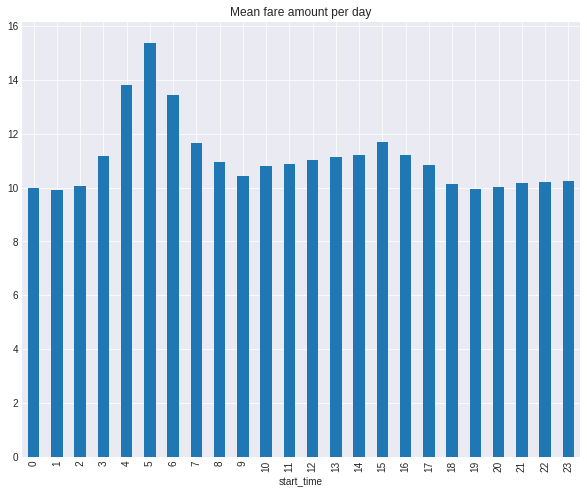

In [15]:
"""
- groupby data by pickup time and estimate the mean 

"""
fig, ax = plt.subplots(figsize=(10,8))
ride_share.groupby('start_time')['fare'].mean().plot.bar()
ax.set_title('Mean fare amount per day')

Text(0.5, 1.0, 'Mean fare amount per hour')

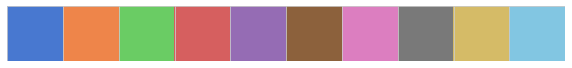

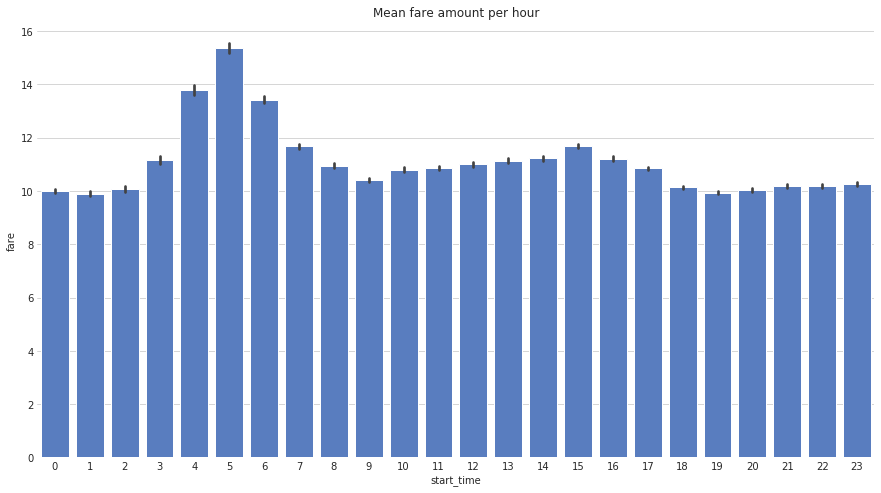

In [16]:
"""
- groupby data by pickup time and estimate the mean 

"""
pal = sns.color_palette('muted')
sns.set_palette(pal)
sns.set_style('whitegrid')
sns.palplot(pal)

plt.figure(figsize=(15,8))
ax = sns.barplot(x=ride_share['start_time'], y=ride_share['fare'], color=pal[0])
# fig, ax = plt.subplots(figsize=(10,8))
# ride_share.groupby('start_time')['fare'].mean().plot.bar()
ax.set_title('Mean fare amount per hour')

Text(0.5, 1.0, 'Mean fare amount per time block')

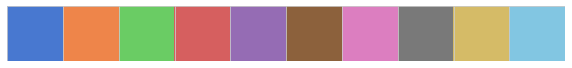

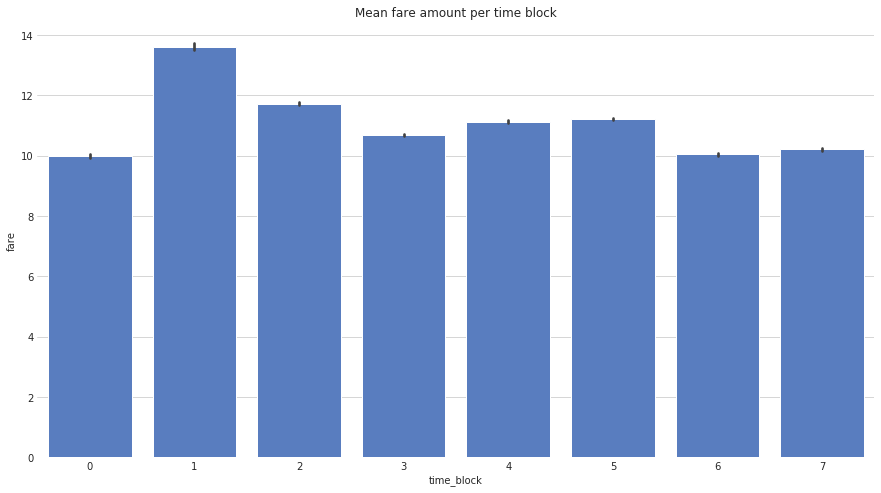

In [17]:
"""
- groupby data by pickup time block estimate the mean 

"""
pal = sns.color_palette('muted')
sns.set_palette(pal)
sns.set_style('whitegrid')
sns.palplot(pal)

plt.figure(figsize=(15,8))
ax = sns.barplot(x=ride_share['time_block'], y=ride_share['fare'], color=pal[0])
ax.set_title('Mean fare amount per time block')

Text(0.5, 1.0, 'Mean fare amount time block')

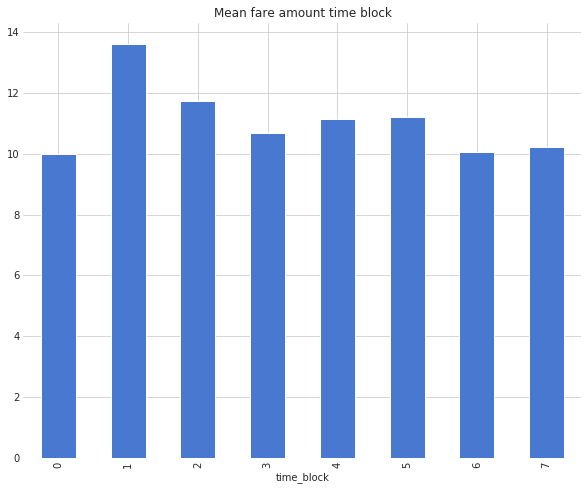

In [18]:
"""
- groupby data by pickup time block and estimate the mean 

"""
fig, ax = plt.subplots(figsize=(10,8))
ride_share.groupby('time_block')['fare'].mean().plot.bar()
ax.set_title('Mean fare amount time block')

In [0]:
ride_share['pickup_community_area'] = ride_share['pickup_community_area'].astype('int64')

Text(0.5, 1.0, 'Mean fare amount pickup area')

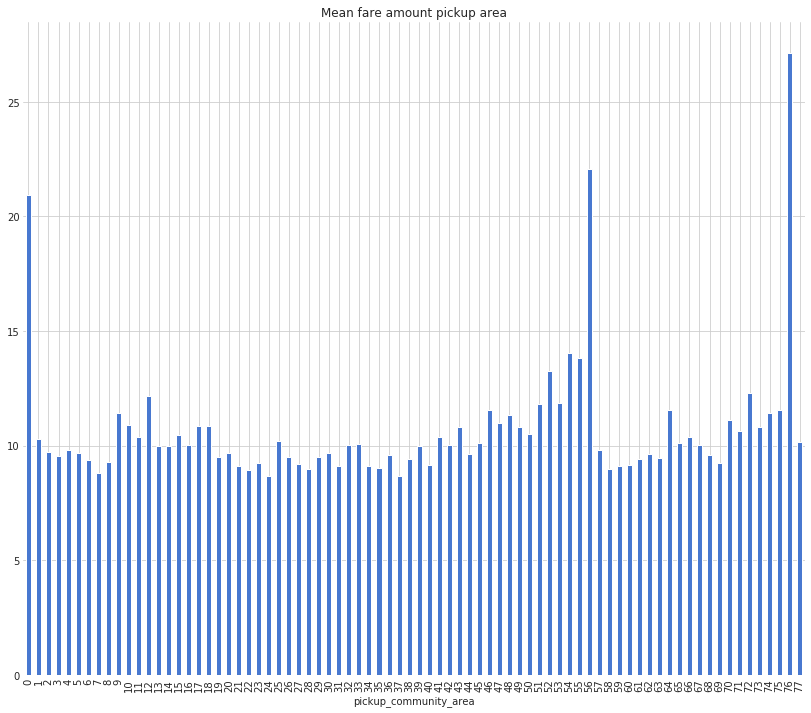

In [20]:
"""
- groupby data by pickup time area and estimate the mean 

"""
fig, ax = plt.subplots(figsize=(14,12))
ride_share.groupby('pickup_community_area')['fare'].mean().plot.bar()
ax.set_title('Mean fare amount pickup area')

# **One Hot Encode the categorical variables**

In [0]:
# Import sklearn and stasmodels modules for encoding and modelling
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import statsmodels.api as sm

In [22]:
# assign the categorical variables to encode
X = ride_share[[ 'start_day', 'time_block', 'pickup_community_area']]
X.shape

(1000000, 3)

In [0]:
# Create One Hot Encoder Object

# 1 Instantiate thh variables

enc = preprocessing.OneHotEncoder()

# 2 Fit

enc.fit(X)

# 3 Transform

onehotlabels = enc.transform(X)

columns = enc.get_feature_names(input_features=X.columns)


X_df = pd.DataFrame(onehotlabels.todense(), columns=columns)

In [24]:
y = ride_share['fare']

#Create train and test data
X_train , X_test, y_train, y_test = train_test_split(X_df, y, test_size=0.25, random_state=12)

#Run the model
X_train = sm.add_constant(X_train)
est = sm.OLS(y_train, X_train).fit()
est.summary()

/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   fare   R-squared:                       0.215
Model:                            OLS   Adj. R-squared:                  0.215
Method:                 Least Squares   F-statistic:                     2283.
Date:                Thu, 23 Jan 2020   Prob (F-statistic):               0.00
Time:                        02:13:40   Log-Likelihood:            -2.6324e+06
No. Observations:              750000   AIC:                         5.265e+06
Df Residuals:                  749909   BIC:                         5.266e+06
Df Model:                          90                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                        8.4585      0.018    482.880      0.000       8.424       8.493
start_day_0                  1.2854      0.025     51.091      0.000       1.236       1.335
start_day_1                  0.9368      0.024     38.738      0.000       0.889       0.984
start_day_2                  0.9867      0.024     40.730      0.000       0.939       1.034
start_day_3                  1.4237      0.023     61.945      0.000       1.379       1.469
start_day_4                  1.5007      0.021     70.720      0.000       1.459       1.542
start_day_5                  1.2786      0.022     59.354      0.000       1.236       1.321
start_day_6                  1.0465      0.024     43.344      0.000       0.999       1.094
time_block_0                 0.3159      0.033      9.664      0.000       0.252       0.380
time_block_1                 3.3321      0.043     76.689      0.000       3.247       3.417
time_block_2                 1.8885      0.026     71.803      0.000       1.837       1.940
time_block_3                 0.6741      0.025     27.254      0.000       0.626       0.723
time_block_4                 0.9033      0.025     36.719      0.000       0.855       0.951
time_block_5                 1.0836      0.022     48.460      0.000       1.040       1.127
time_block_6                 0.0805      0.021      3.768      0.000       0.039       0.122
time_block_7                 0.1806      0.024      7.643      0.000       0.134       0.227
pickup_community_area_0     10.2076      0.044    230.203      0.000      10.121      10.295
pickup_community_area_1     -0.3189      0.087     -3.666      0.000      -0.489      -0.148
pickup_community_area_2     -0.8707      0.102     -8.532      0.000      -1.071      -0.671
pickup_community_area_3     -0.9409      0.067    -14.058      0.000      -1.072      -0.810
pickup_community_area_4     -0.6907      0.090     -7.652      0.000      -0.868      -0.514
pickup_community_area_5     -0.7543      0.085     -8.852      0.000      -0.921      -0.587
pickup_community_area_6     -1.1126      0.042    -26.630      0.000      -1.195      -1.031
pickup_community_area_7     -1.6334      0.045    -36.153      0.000      -1.722      -1.545
pickup_community_area_8     -1.1375      0.032    -35.689      0.000      -1.200      -1.075
pickup_community_area_9      0.6566      0.305      2.156      0.031       0.060       1.254
pickup_community_area_10     0.1725      0.176      0.980      0.327      -0.172       0.517
pickup_community_area_11    -0.2054      0.181     -1.135      0.257      -0.560       0.149
pickup_community_area_12     1.6926      0.262      6.459      0.000       1.179       2.206
pickup_community_area_13    -0.5880      0.193     -3.053      0.002      -0.966      -0.211
pickup_communi

In [0]:
from sklearn.linear_model import LinearRegression 

In [26]:
regr = LinearRegression() 
  
regr.fit(X_train, y_train) 
#print(regr.score(X_test, y_test))

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [0]:
from sklearn.metrics import mean_squared_error, r2_score
import scipy.stats as stats

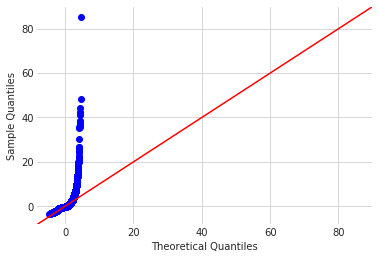

In [28]:
residuals = est.resid
fig = sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True)
fig.show()